# Phase 1

### Step 1. Load Libraries and neccesaary things

In [5]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns


In [23]:
customer_data = pd.read_csv('C:\Retail Reimagined\Given Datasets\QVI_purchase_behaviour.csv')
transaction_data = pd.read_excel('C:\Retail Reimagined\Given Datasets\QVI_transaction_data.xlsx')

<>:1: SyntaxWarning: invalid escape sequence '\R'
<>:2: SyntaxWarning: invalid escape sequence '\R'
<>:1: SyntaxWarning: invalid escape sequence '\R'
<>:2: SyntaxWarning: invalid escape sequence '\R'
C:\Users\welcome\AppData\Local\Temp\ipykernel_5656\4127624205.py:1: SyntaxWarning: invalid escape sequence '\R'
  customer_data = pd.read_csv('C:\Retail Reimagined\Given Datasets\QVI_purchase_behaviour.csv')
C:\Users\welcome\AppData\Local\Temp\ipykernel_5656\4127624205.py:2: SyntaxWarning: invalid escape sequence '\R'
  transaction_data = pd.read_excel('C:\Retail Reimagined\Given Datasets\QVI_transaction_data.xlsx')


In [17]:
import os
print(os.getcwd())


c:\Retail Reimagined\Phase 1


In [24]:
customer_data.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [25]:
transaction_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


### Step 2: Exploratory Data Analysis (EDA)

In [26]:
# checking info , nulls and duplicates first

In [27]:
transaction_data.info(),customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
m

(None, None)

In [28]:
transaction_data.isnull().sum(),customer_data.isnull().sum()

(DATE              0
 STORE_NBR         0
 LYLTY_CARD_NBR    0
 TXN_ID            0
 PROD_NBR          0
 PROD_NAME         0
 PROD_QTY          0
 TOT_SALES         0
 dtype: int64,
 LYLTY_CARD_NBR      0
 LIFESTAGE           0
 PREMIUM_CUSTOMER    0
 dtype: int64)

In [29]:
transaction_data.duplicated().sum(),customer_data.duplicated().sum()

(np.int64(1), np.int64(0))

In [30]:
transaction_data.drop_duplicates(inplace=True)

In [31]:
# now let's see their satsitical summary

In [32]:
transaction_data.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264835.000000,264835.000000,2.648350e+05,2.648350e+05,264835.000000,264835.000000,264835.000000
mean,43464.036600,135.080216,1.355496e+05,1.351584e+05,56.583201,1.907308,7.304205
std,105.389336,76.784306,8.058011e+04,7.813316e+04,32.826692,0.643655,3.083231
min,43282.000000,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,43373.000000,70.000000,7.002100e+04,6.760100e+04,28.000000,2.000000,5.400000
50%,43464.000000,130.000000,1.303580e+05,1.351380e+05,56.000000,2.000000,7.400000
75%,43555.000000,203.000000,2.030945e+05,2.027015e+05,85.000000,2.000000,9.200000
max,43646.000000,272.000000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


In [33]:
# we can see some abnormality in the stats of PROD_QTY and PROD_SALES , we will check them later on

In [34]:
# We can see that the date is in object format , we will convert it to datetime format and in proper format

In [35]:
transaction_data['DATE'] = pd.to_datetime(transaction_data['DATE'], origin='1899-12-30', unit='D')

In [36]:
unique_products = transaction_data['PROD_NAME'].unique()
unique_products[:10]

array(['Natural Chip        Compny SeaSalt175g',
       'CCs Nacho Cheese    175g',
       'Smiths Crinkle Cut  Chips Chicken 170g',
       'Smiths Chip Thinly  S/Cream&Onion 175g',
       'Kettle Tortilla ChpsHny&Jlpno Chili 150g',
       'Old El Paso Salsa   Dip Tomato Mild 300g',
       'Smiths Crinkle Chips Salt & Vinegar 330g',
       'Grain Waves         Sweet Chilli 210g',
       'Doritos Corn Chip Mexican Jalapeno 150g',
       'Grain Waves Sour    Cream&Chives 210G'], dtype=object)

In [37]:
# Next, we’ll clean the product names and filter out any non-chip items — 
# this is crucial to make sure we’re only analyzing relevant data.

In [38]:
# Split product names into words
product_words = pd.Series(' '.join(transaction_data['PROD_NAME'].unique()).split())

# Remove words with digits or special characters
product_words = product_words[~product_words.str.contains(r'\d|[^a-zA-Z]', regex=True)]

# Count word frequencies
word_counts = product_words.value_counts()

# Print the top 10 most common words
print(word_counts.head(10))

# Remove salsa products
transaction_data = transaction_data[~transaction_data['PROD_NAME'].str.contains('salsa', case=False)]

Chips       21
Smiths      16
Cut         14
Crinkle     14
Kettle      13
Salt        12
Cheese      12
Original    10
Salsa        9
Doritos      9
Name: count, dtype: int64


In [39]:
# now as we mentioned , we will be handling outliers in PROD_QTY and PROD_SALES

In [40]:
transaction_data = transaction_data[transaction_data['PROD_QTY'] < 200]

### Analyze Transaction Trends Over Time

In [41]:
# We’ll count the number of transactions per day and visualize them to 
# check for missing data, seasonal trends, and anomalies.

In [42]:
transactions_per_day = transaction_data.groupby('DATE').size().reset_index(name='COUNT')

In [43]:
transactions_per_day

,DATE,COUNT
0,2018-07-01,663
1,2018-07-02,650
2,2018-07-03,674
3,2018-07-04,669
4,2018-07-05,660
...,...,...
359,2019-06-26,657
360,2019-06-27,669
361,2019-06-28,673
362,2019-06-29,703


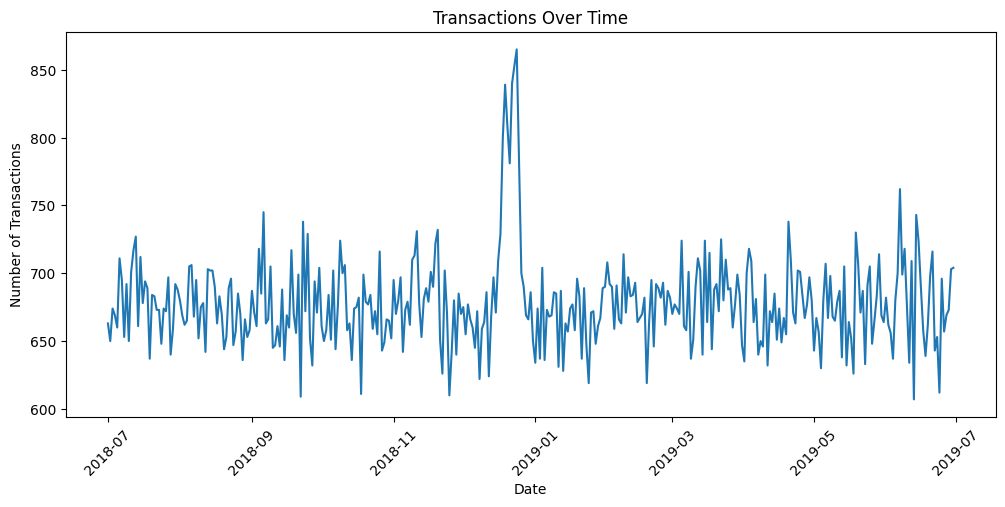

In [44]:
# Plot the number of transactions over time
plt.figure(figsize=(12, 5))
sns.lineplot(x='DATE', y='COUNT', data=transactions_per_day)
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.title('Transactions Over Time')
plt.xticks(rotation=45)
plt.show()

In [45]:
# Now to analyze and check for missing dates , we will create a list of all dates and merge it with transaction data 

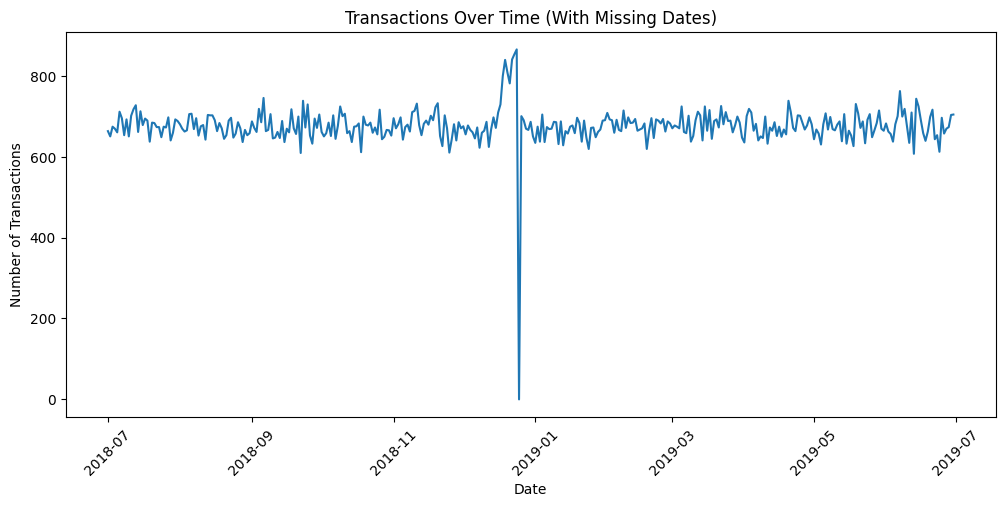

In [46]:
date_range = pd.DataFrame({'DATE': pd.date_range(start='2018-07-01', end='2019-06-30')})

transactions_by_day = date_range.merge(transactions_per_day, on='DATE', how='left').fillna(0)

# Plot the number of transactions over time
plt.figure(figsize=(12, 5))
sns.lineplot(x='DATE', y='COUNT', data=transactions_by_day)
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.title('Transactions Over Time (With Missing Dates)')
plt.xticks(rotation=45)
plt.show()

In [47]:
# we can see that there are definitely missing dates in the month of  dec 2018 and it also has a big spike 
# so let's zoom on the month of december

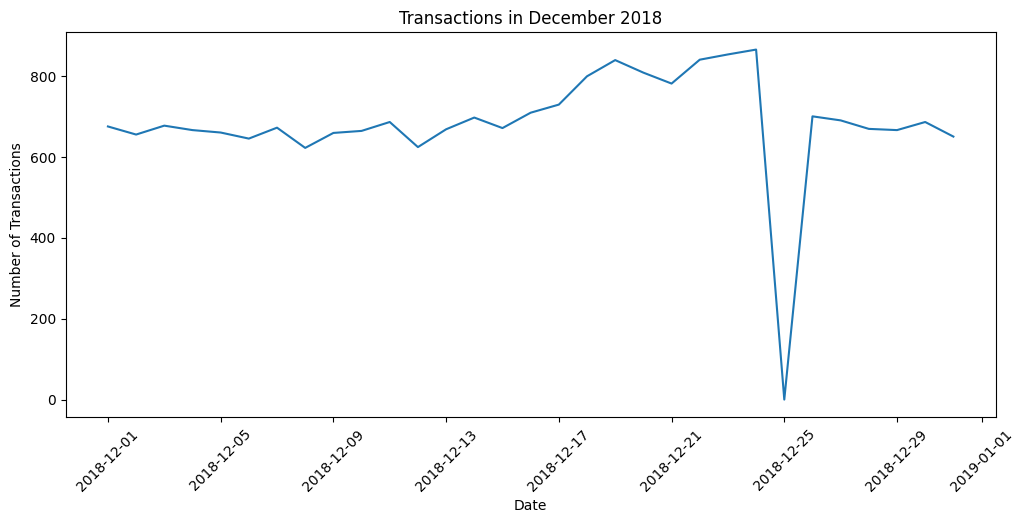

In [48]:
# Filter for December 2018
december_sales = transactions_by_day[(transactions_by_day['DATE'] >= '2018-12-01') & 
                                     (transactions_by_day['DATE'] <= '2018-12-31')]

# Plot December transaction trends
plt.figure(figsize=(12, 5))
sns.lineplot(x='DATE', y='COUNT', data=december_sales)
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.title('Transactions in December 2018')
plt.xticks(rotation=45)
plt.show()

In [49]:
# we can clearly see that the sales went high just before the christmas and then dropped on chistmas day , maybe 
# because of the holiday

###  Extract Pack Sizes from Product Names

In [50]:
# Now, let's extract pack sizes from product names so we can analyze customer preferences.

In [51]:
transaction_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [52]:
import re

# Extract pack size using regex
transaction_data['PACK_SIZE'] = transaction_data['PROD_NAME'].apply(lambda x: int(re.findall(r'\d+', x)[-1]) if re.findall(r'\d+', x) else np.nan)

In [53]:
transaction_data['PACK_SIZE'].value_counts().sort_index()

PACK_SIZE
70      1507
90      3008
110    22387
125     1454
134    25102
135     3257
150    40203
160     2970
165    15297
170    19983
175    66389
180     1468
190     2995
200     4473
210     6272
220     1564
250     3169
270     6285
330    12540
380     6416
Name: count, dtype: int64

In [54]:
# now let's plot the pack size distribution to see the most buyed or popular pack sizes

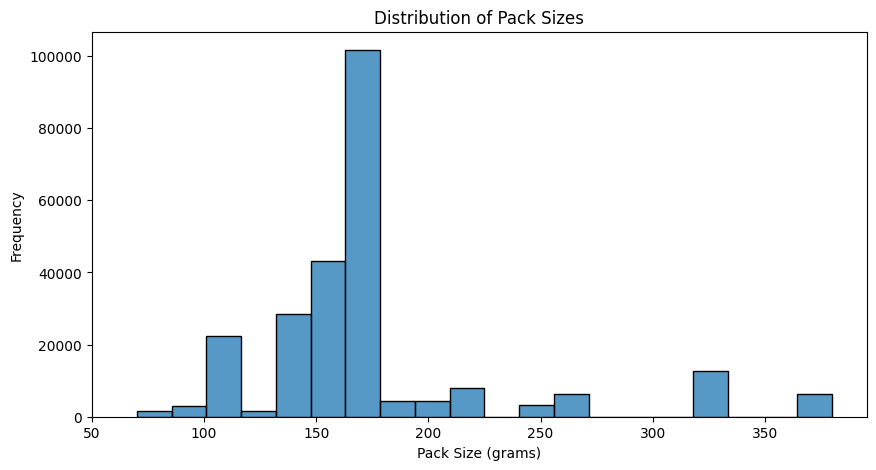

In [55]:
plt.figure(figsize=(10, 5))
sns.histplot(transaction_data['PACK_SIZE'], bins=20, kde=False)
plt.xlabel('Pack Size (grams)')
plt.ylabel('Frequency')
plt.title('Distribution of Pack Sizes')
plt.xticks(range(50, 400, 50))
plt.show()

In [56]:
# around 175g and 150g are the most popular pack sizes

### Extract Brand Names from Product Names


In [57]:
transaction_data['BRAND'] = transaction_data['PROD_NAME'].apply(lambda x: x.split()[0].upper())

In [58]:
transaction_data['BRAND'].value_counts()

BRAND
KETTLE        41288
SMITHS        27389
PRINGLES      25102
DORITOS       22041
THINS         14075
RRD           11894
INFUZIONS     11057
WW            10320
COBS           9693
TOSTITOS       9471
TWISTIES       9454
TYRRELLS       6442
GRAIN          6272
NATURAL        6050
CHEEZELS       4603
CCS            4551
RED            4427
DORITO         3183
INFZNS         3144
SMITH          2963
CHEETOS        2927
SNBTS          1576
BURGER         1564
WOOLWORTHS     1516
GRNWVES        1468
SUNBITES       1432
NCC            1419
FRENCH         1418
Name: count, dtype: int64

In [59]:
# as we can see Brand names needs cleanup , we will do that

In [60]:

brand_corrections = {
    "RED": "RRD",
    "SNBTS": "SUNBITES",
    "INFZNS": "INFUZIONS",
    "WW": "WOOLWORTHS",
    "SMITH": "SMITHS",
    "NCC": "NATURAL",
    "DORITO": "DORITOS",
    "GRAIN": "GRNWVES"
}

transaction_data['BRAND'] = transaction_data['BRAND'].replace(brand_corrections)

In [61]:
transaction_data['BRAND'].value_counts().head(10)

BRAND
KETTLE        41288
SMITHS        30352
DORITOS       25224
PRINGLES      25102
RRD           16321
INFUZIONS     14201
THINS         14075
WOOLWORTHS    11836
COBS           9693
TOSTITOS       9471
Name: count, dtype: int64

#### we can clearly see that the Brands - KETTLE , SMITHS and DORITOS are the top 3 most demanding brands!

In [62]:
transaction_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175,CCS
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170,SMITHS
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175,SMITHS
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150,KETTLE


In [63]:
# everything is pretty much good now in transaction data , let's move to customer data

### Examine Customer Data

In [64]:
customer_data['LIFESTAGE'].value_counts()


LIFESTAGE
RETIREES                  14805
OLDER SINGLES/COUPLES     14609
YOUNG SINGLES/COUPLES     14441
OLDER FAMILIES             9780
YOUNG FAMILIES             9178
MIDAGE SINGLES/COUPLES     7275
NEW FAMILIES               2549
Name: count, dtype: int64

In [65]:
customer_data['PREMIUM_CUSTOMER'].value_counts()

PREMIUM_CUSTOMER
Mainstream    29245
Budget        24470
Premium       18922
Name: count, dtype: int64

### Merge Customer and Transaction Data

In [66]:
merged_data = transaction_data.merge(customer_data, on='LYLTY_CARD_NBR', how='left')

In [67]:
merged_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175,CCS,MIDAGE SINGLES/COUPLES,Budget
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170,SMITHS,MIDAGE SINGLES/COUPLES,Budget
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175,SMITHS,MIDAGE SINGLES/COUPLES,Budget
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150,KETTLE,MIDAGE SINGLES/COUPLES,Budget


In [68]:
merged_data.isnull().sum()

DATE                0
STORE_NBR           0
LYLTY_CARD_NBR      0
TXN_ID              0
PROD_NBR            0
PROD_NAME           0
PROD_QTY            0
TOT_SALES           0
PACK_SIZE           0
BRAND               0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

In [69]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246739 entries, 0 to 246738
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   DATE              246739 non-null  datetime64[ns]
 1   STORE_NBR         246739 non-null  int64         
 2   LYLTY_CARD_NBR    246739 non-null  int64         
 3   TXN_ID            246739 non-null  int64         
 4   PROD_NBR          246739 non-null  int64         
 5   PROD_NAME         246739 non-null  object        
 6   PROD_QTY          246739 non-null  int64         
 7   TOT_SALES         246739 non-null  float64       
 8   PACK_SIZE         246739 non-null  int64         
 9   BRAND             246739 non-null  object        
 10  LIFESTAGE         246739 non-null  object        
 11  PREMIUM_CUSTOMER  246739 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(6), object(4)
memory usage: 22.6+ MB


## Advanced Analysis

### Analyze Total Chip Sales by Customer Segment

In [70]:
sales_by_segment=merged_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES'].sum().reset_index()

In [71]:
sales_by_segment = sales_by_segment.sort_values(by='TOT_SALES', ascending=False)

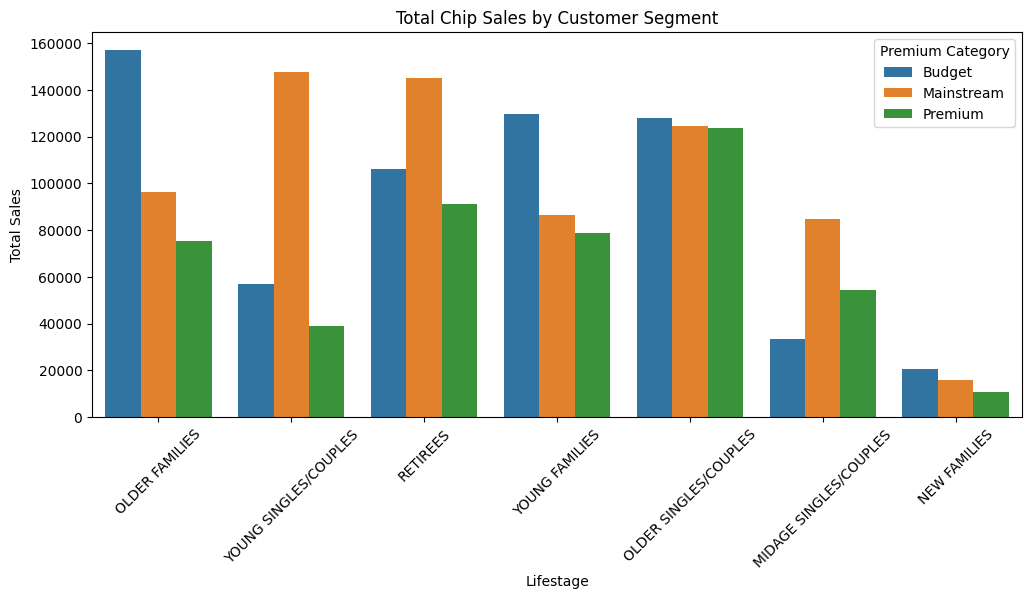

In [72]:
plt.figure(figsize=(12, 5))
sns.barplot(x='LIFESTAGE', y='TOT_SALES', hue='PREMIUM_CUSTOMER', data=sales_by_segment)
plt.xlabel('Lifestage')
plt.ylabel('Total Sales')
plt.title('Total Chip Sales by Customer Segment')
plt.xticks(rotation=45)
plt.legend(title='Premium Category')
plt.show()

In [73]:
# As we can see , the top 3 sales are from older families , young singles/couples and retirees ,
# and the top 3 sales are from budget , mainstream and mainstream customers respectively

# but is this because of the number of customers in each segment or the average sales per customer in each segment ,
# let's check that

###  Analyze Number of Customers by Segment

In [74]:
customers_by_segment =merged_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['LYLTY_CARD_NBR'].nunique().reset_index()

In [75]:
customers_by_segment.rename(columns={'LYLTY_CARD_NBR': 'CUSTOMER_COUNT'}, inplace=True)

In [76]:
customers_by_segment = customers_by_segment.sort_values(by='CUSTOMER_COUNT', ascending=False)

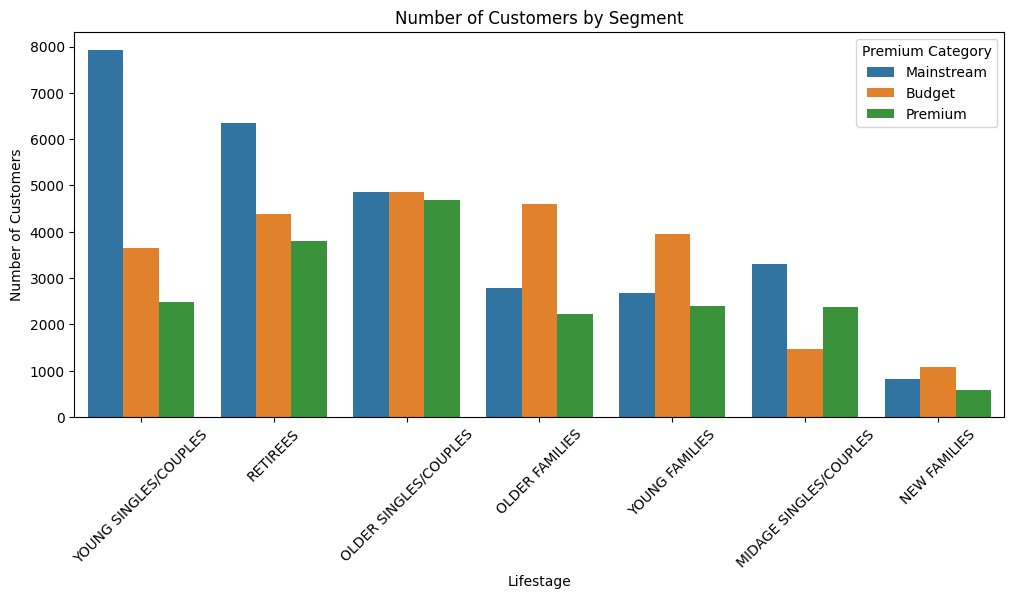

In [77]:
# Plot customer distribution
plt.figure(figsize=(12, 5))
sns.barplot(x='LIFESTAGE', y='CUSTOMER_COUNT', hue='PREMIUM_CUSTOMER', data=customers_by_segment)
plt.xlabel('Lifestage')
plt.ylabel('Number of Customers')
plt.title('Number of Customers by Segment')
plt.xticks(rotation=45)
plt.legend(title='Premium Category')
plt.show()

In [78]:
# here as we can see the count of customers by segement , where young singles/couples and retirees and retires are ruling
# but this is not the case for older families , they have less customer count but still they have most in the budget 
# category compared to their categories

### Analyze Average Chips Bought Per Customer

In [79]:
# Calculate average number of units per customer
avg_units_per_customer = merged_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).apply(
    lambda x: x['PROD_QTY'].sum() / x['LYLTY_CARD_NBR'].nunique()).reset_index(name='AVG_UNITS')


C:\Users\welcome\AppData\Local\Temp\ipykernel_5656\1716348087.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  avg_units_per_customer = merged_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).apply(


In [80]:
avg_units_per_customer = avg_units_per_customer.sort_values(by='AVG_UNITS', ascending=False)

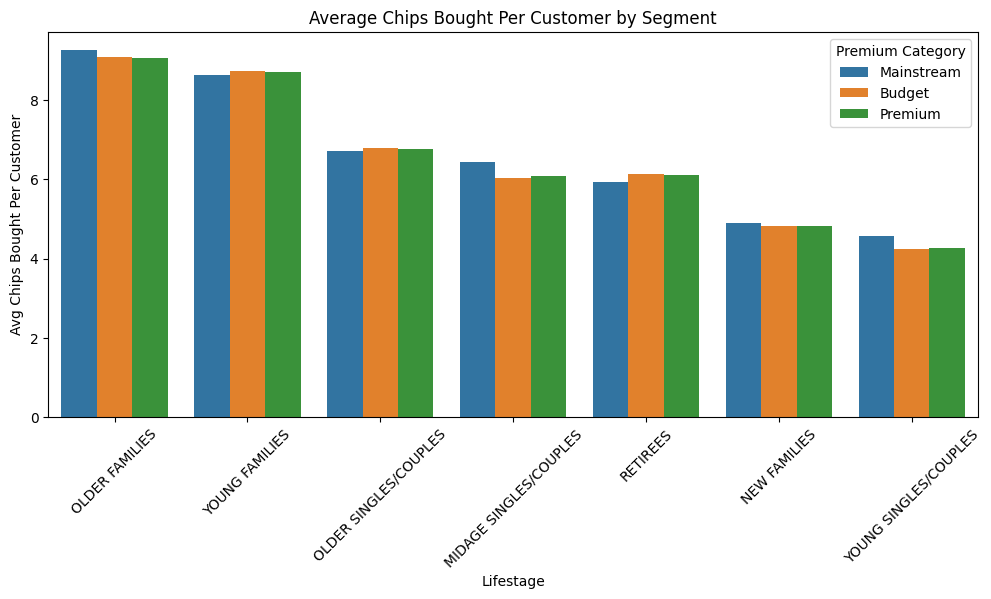

In [81]:
# Plot average units per customer
plt.figure(figsize=(12, 5))
sns.barplot(x='LIFESTAGE', y='AVG_UNITS', hue='PREMIUM_CUSTOMER', data=avg_units_per_customer)
plt.xlabel('Lifestage')
plt.ylabel('Avg Chips Bought Per Customer')
plt.title('Average Chips Bought Per Customer by Segment')
plt.xticks(rotation=45)
plt.legend(title='Premium Category')
plt.show()

In [82]:
# we can see that older families are buying more chips per customer than any other segment

In [83]:
# Next, we’ll analyze the average price per unit of chips bought per segment to see if some
# groups prefer premium or budget chips.

### Analyze Average Price Per Unit by Customer Segment

In [84]:
avg_price_per_unit = merged_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).apply(lambda x: x['TOT_SALES'].sum() / x['PROD_QTY'].sum()).reset_index(name='AVG_PRICE')

C:\Users\welcome\AppData\Local\Temp\ipykernel_5656\4066298467.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  avg_price_per_unit = merged_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).apply(lambda x: x['TOT_SALES'].sum() / x['PROD_QTY'].sum()).reset_index(name='AVG_PRICE')


In [85]:
avg_price_per_unit = avg_price_per_unit.sort_values(by='AVG_PRICE', ascending=False)

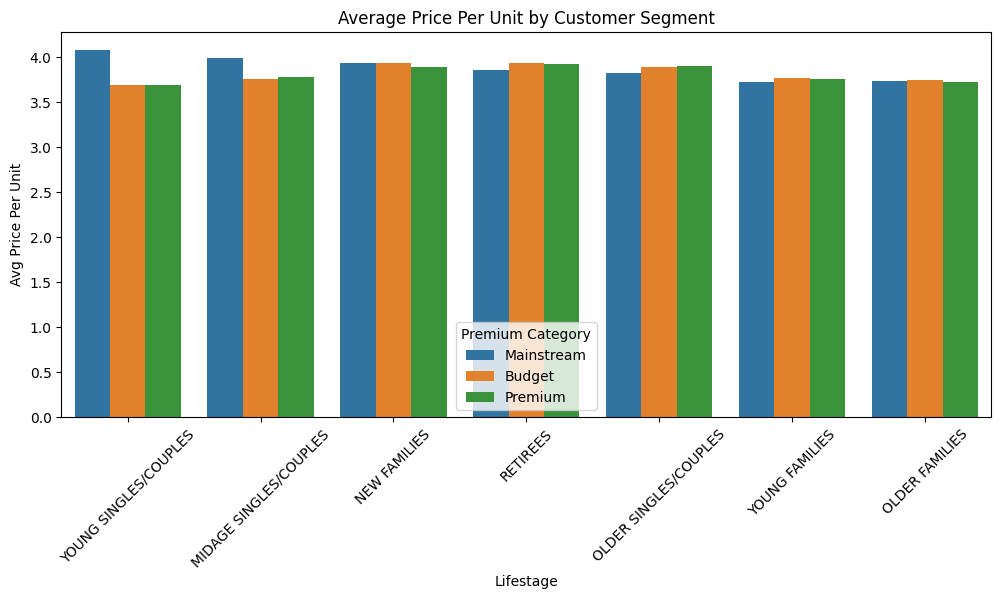

In [86]:
# Plot average price per unit
plt.figure(figsize=(12, 5))
sns.barplot(x='LIFESTAGE', y='AVG_PRICE', hue='PREMIUM_CUSTOMER', data=avg_price_per_unit)
plt.xlabel('Lifestage')
plt.ylabel('Avg Price Per Unit')
plt.title('Average Price Per Unit by Customer Segment')
plt.xticks(rotation=45)
plt.legend(title='Premium Category')
plt.show()

In [87]:
# here we can see young singles/couples are mostly buying mainstream chips , and rest of the segments don't have much
# variation in their buying 

In [88]:
# Next, we’ll perform a statistical test (t-test) to check if the price difference is significant between customer groups. 

### Perform a T-Test to Compare Price Differences

In [89]:
# We’ll run an independent t-test to see if there is a statistically significant difference 
# in chip prices between Mainstream vs Budget/Premium customers in the Young & Mid-age Singles/Couples segments.

In [90]:
# Create subsets for the two groups
mainstream_prices = merged_data[
    (merged_data['LIFESTAGE'].isin(['YOUNG SINGLES/COUPLES', 'MIDAGE SINGLES/COUPLES'])) & 
    (merged_data['PREMIUM_CUSTOMER'] == 'Mainstream')
]['TOT_SALES'] / merged_data['PROD_QTY']

other_prices = merged_data[
    (merged_data['LIFESTAGE'].isin(['YOUNG SINGLES/COUPLES', 'MIDAGE SINGLES/COUPLES'])) & 
    (merged_data['PREMIUM_CUSTOMER'] != 'Mainstream')
]['TOT_SALES'] / merged_data['PROD_QTY']


In [91]:
from scipy.stats import ttest_ind

# Perform the t-test
t_stat, p_value = ttest_ind(mainstream_prices.dropna(), other_prices.dropna(), alternative='greater')


In [96]:
# Print results
print(f"T-statistic: {t_stat:.2f}")
print(f"P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("The price difference is statistically significant. Mainstream customers pay significantly more per unit.")
else:
    print("No significant difference in price per unit between Mainstream and other customers.")


T-statistic: 37.83
P-value: 1.11782280577468e-309
The price difference is statistically significant. Mainstream customers pay significantly more per unit.


In [97]:
#  Now, let’s analyze brand preferences for Mainstream Young Singles/Couples to see which brands
# they prefer more than other customers.

### Analyze Brand Preferences for Mainstream Young Singles/Couples

In [98]:
merged_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175,CCS,MIDAGE SINGLES/COUPLES,Budget
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170,SMITHS,MIDAGE SINGLES/COUPLES,Budget
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175,SMITHS,MIDAGE SINGLES/COUPLES,Budget
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150,KETTLE,MIDAGE SINGLES/COUPLES,Budget


In [99]:
segment1 = merged_data[
    (merged_data['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES') &
    (merged_data['PREMIUM_CUSTOMER'] == 'Mainstream')
]

other = merged_data[~((merged_data['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES') &
    (merged_data['PREMIUM_CUSTOMER'] == 'Mainstream'))
]

In [100]:
total_chips_segment1 = segment1['PROD_QTY'].sum()
total_chips_other = other['PROD_QTY'].sum()

In [101]:
brand_segment1 =segment1.groupby('BRAND')['PROD_QTY'].sum().reset_index()
brand_other = other.groupby('BRAND')['PROD_QTY'].sum().reset_index()



In [102]:
brand_segment1['TARGET_SEGMENT_RATIO'] = brand_segment1['PROD_QTY'] / total_chips_segment1
brand_segment1


,BRAND,PROD_QTY,TARGET_SEGMENT_RATIO
0,BURGER,106,0.002926
1,CCS,405,0.011180
2,CHEETOS,291,0.008033
3,CHEEZELS,651,0.017971
4,COBS,1617,0.044638
5,DORITOS,4447,0.122761
6,FRENCH,143,0.003948
7,GRNWVES,1185,0.032712
8,INFUZIONS,2343,0.064679
9,KETTLE,7172,0.197985


In [103]:
brand_other['OTHER_SEGMENT_RATIO'] = brand_other['PROD_QTY'] / total_chips_other
brand_other

,BRAND,PROD_QTY,OTHER_SEGMENT_RATIO
0,BURGER,2864,0.006596
1,CCS,8204,0.018896
2,CHEETOS,5239,0.012067
3,CHEEZELS,8096,0.018647
4,COBS,16954,0.039049
5,DORITOS,43884,0.101075
6,FRENCH,2500,0.005758
7,GRNWVES,13541,0.031188
8,INFUZIONS,24776,0.057065
9,KETTLE,71879,0.165554


In [104]:
brand_preference = brand_segment1.merge(brand_other, on='BRAND', suffixes=('_TARGET', '_OTHER'))


In [105]:
brand_preference

,BRAND,PROD_QTY_TARGET,TARGET_SEGMENT_RATIO,PROD_QTY_OTHER,OTHER_SEGMENT_RATIO
0,BURGER,106,0.002926,2864,0.006596
1,CCS,405,0.011180,8204,0.018896
2,CHEETOS,291,0.008033,5239,0.012067
3,CHEEZELS,651,0.017971,8096,0.018647
4,COBS,1617,0.044638,16954,0.039049
5,DORITOS,4447,0.122761,43884,0.101075
6,FRENCH,143,0.003948,2500,0.005758
7,GRNWVES,1185,0.032712,13541,0.031188
8,INFUZIONS,2343,0.064679,24776,0.057065
9,KETTLE,7172,0.197985,71879,0.165554


In [106]:
brand_preference['AFFINITY_TO_BRAND'] = brand_preference['TARGET_SEGMENT_RATIO'] / brand_preference['OTHER_SEGMENT_RATIO']

In [107]:
brand_preference

,BRAND,PROD_QTY_TARGET,TARGET_SEGMENT_RATIO,PROD_QTY_OTHER,OTHER_SEGMENT_RATIO,AFFINITY_TO_BRAND
0,BURGER,106,0.002926,2864,0.006596,0.443595
1,CCS,405,0.011180,8204,0.018896,0.591674
2,CHEETOS,291,0.008033,5239,0.012067,0.665730
3,CHEEZELS,651,0.017971,8096,0.018647,0.963749
4,COBS,1617,0.044638,16954,0.039049,1.143119
5,DORITOS,4447,0.122761,43884,0.101075,1.214547
6,FRENCH,143,0.003948,2500,0.005758,0.685566
7,GRNWVES,1185,0.032712,13541,0.031188,1.048868
8,INFUZIONS,2343,0.064679,24776,0.057065,1.133430
9,KETTLE,7172,0.197985,71879,0.165554,1.195891


In [108]:
brand_preference=brand_preference.sort_values(by='AFFINITY_TO_BRAND', ascending= False)

In [109]:
# Display top 10 brands preferred by the segment
print(brand_preference[['BRAND', 'AFFINITY_TO_BRAND']].head(10))

        BRAND  AFFINITY_TO_BRAND
18   TYRRELLS           1.228090
17   TWISTIES           1.219314
5     DORITOS           1.214547
9      KETTLE           1.195891
16   TOSTITOS           1.195708
11   PRINGLES           1.186665
4        COBS           1.143119
8   INFUZIONS           1.133430
15      THINS           1.059418
7     GRNWVES           1.048868


### Visualize Brand Preferences

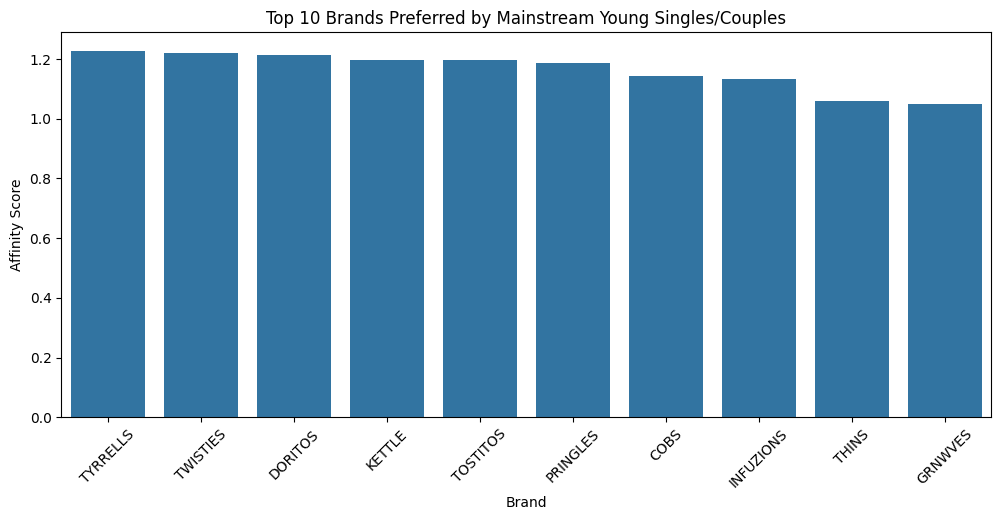

In [110]:
# Plot brand affinity scores
plt.figure(figsize=(12, 5))
sns.barplot(x='BRAND', y='AFFINITY_TO_BRAND', data=brand_preference.head(10))
plt.xlabel('Brand')
plt.ylabel('Affinity Score')
plt.title('Top 10 Brands Preferred by Mainstream Young Singles/Couples')
plt.xticks(rotation=45)
plt.show()


### Analyze Preferred Pack Sizes for Mainstream Young Singles/Couples

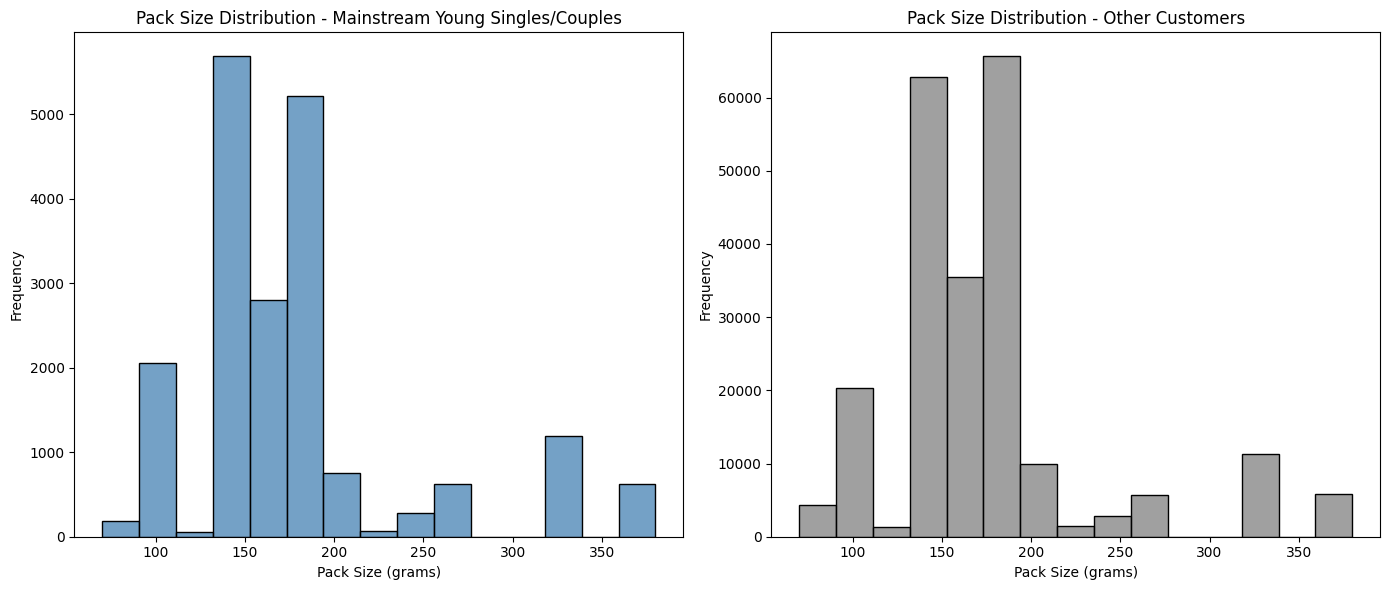

In [111]:
# Plot histograms side by side for comparison
plt.figure(figsize=(14, 6))

# Mainstream segment
plt.subplot(1, 2, 1)
sns.histplot(segment1['PACK_SIZE'], bins=15, kde=False, color='steelblue')
plt.title('Pack Size Distribution - Mainstream Young Singles/Couples')
plt.xlabel('Pack Size (grams)')
plt.ylabel('Frequency')

# Other customers
plt.subplot(1, 2, 2)
sns.histplot(other['PACK_SIZE'], bins=15, kde=False, color='gray')
plt.title('Pack Size Distribution - Other Customers')
plt.xlabel('Pack Size (grams)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


## Concluding Our Analysis

## 📊 Business Insights & Recommendations

### 🧠 What We Learned

1. **Top Customer Segment**
   - Budget Older Families and Mainstream Young Singles/Couples are the highest spending groups.
   - Budget Older Families may have highest avg chips bought per customer but Mainstream Young Singles/Couples
   purchase more frequently and at a higher price per unit.
   

2. **Statistically Significant Spending**
   - A t-test confirmed that this segment **pays significantly more per unit** than Budget/Premium customers.
   - This shows **low price sensitivity**, indicating willingness to spend on preferred products.

3. **Brand Preferences**
   - Mainstream Young Singles/Couples show a strong preference for specific brands.
   - These preferences are not random — they consistently favor certain brands over others.

4. **Preferred Pack Sizes**
   - Most purchases are in the **150g to 175g** range.
   - This suggests a preference for **standard snack-size packs**, ideal for individual or duo consumption.

---

### 💼 Business Recommendations

- 🎯 **Target High-Value Segments:** Focus marketing campaigns and promotions on Mainstream Young Singles & Couples.
- 🛍️ **Bundle Premium Offers:** Introduce value bundles or premium pricing tiers — these customers are less price sensitive.
- 🤝 **Brand Partnerships:** Promote brands with the highest affinity among this segment through exclusive partnerships or featured product placements.
- 🧃 **Stock Smartly:** Prioritize availability of 150g–175g pack sizes across stores where these customer groups are active.
- 📈 **Repeat Data Analysis:** Use this data-driven approach periodically to fine-tune campaigns, pricing, and inventory.

---
